In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from polars_backtest import back_test_portfolio
from yahoo_data import TICKERS
import pyfolio as pf
import polars as pl

%matplotlib inline

df = back_test_portfolio(tickers=TICKERS, risk_budget=[.6, .35, .05])
weights = df["BOP.Weight"]
weights = weights.loc[:, weights.columns != 'Residual']
pf.timeseries.perf_stats(df["returns"])

SPY_Return       -0.055719
VUSTX_Return      0.031441
^SPGSCI_Return   -0.313286
dtype: float64
One or more periods do not have investment equal to 1. Creating residual weights.
Took 0.30900025367736816 seconds to backtest the portfolio


Annual return           0.081301
Cumulative returns      9.237305
Annual volatility       0.153333
Sharpe ratio            0.586634
Calmar ratio            0.163090
Stability               0.942234
Max drawdown           -0.498505
Omega ratio             1.120064
Sortino ratio           0.826813
Skew                   -0.192682
Kurtosis               13.258934
Tail ratio              0.980108
Daily value at risk    -0.018961
dtype: float64

,SPY_weight,VUSTX_weight,^SPGSCI_weight
count,7499.000000,7499.000000,7499.000000
mean,0.600244,0.147623,0.204794
std,0.186530,0.111381,0.135522
min,0.000000,0.000000,0.000000
25%,0.534193,0.061858,0.079820
50%,0.568046,0.129419,0.211956
75%,0.745266,0.209295,0.318111
max,0.904249,0.449625,0.469803


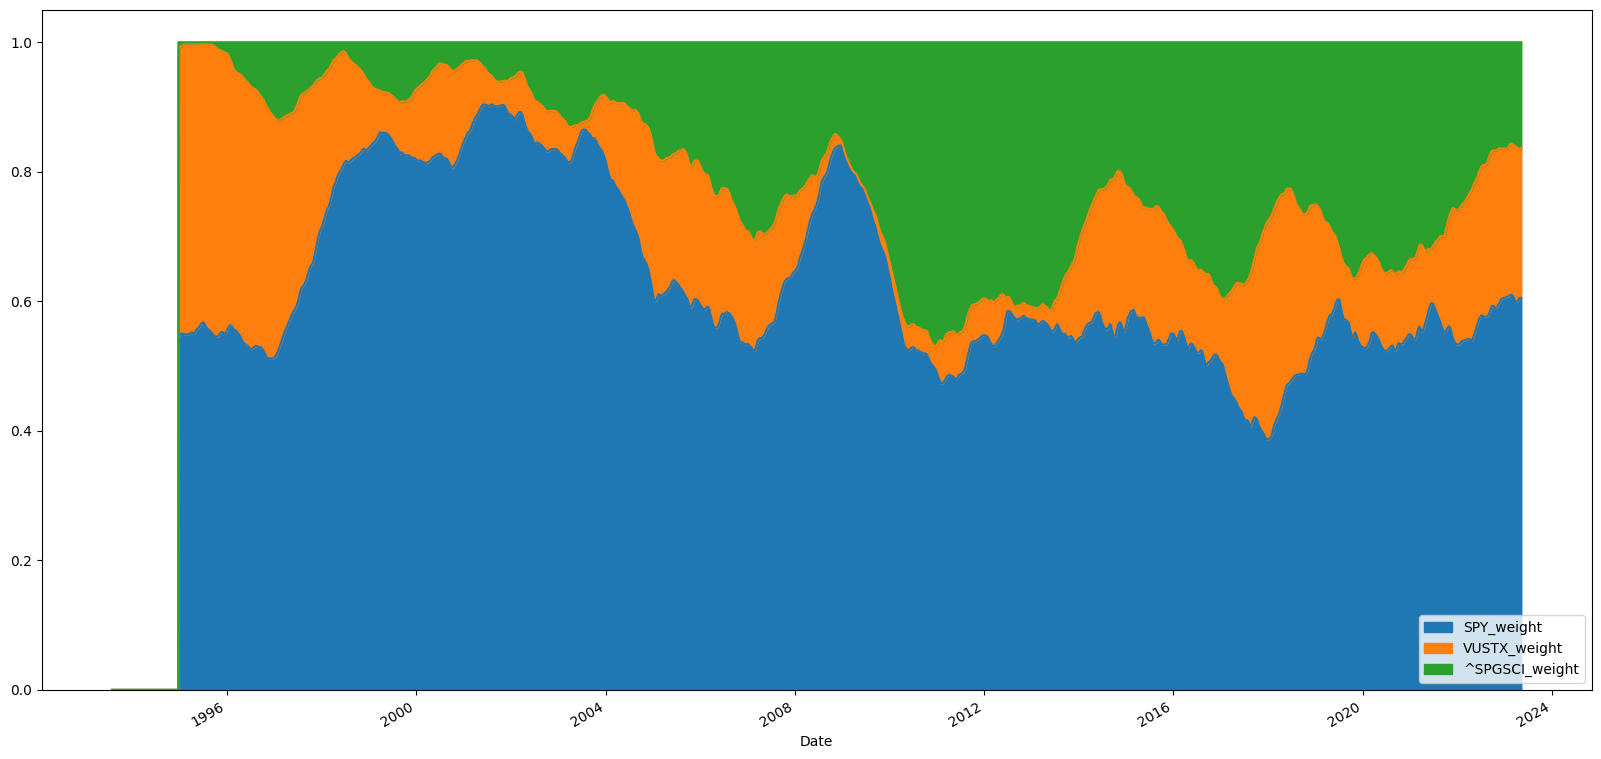

In [2]:
weights.plot.area(figsize=(20, 10))
weights.describe()

In [6]:
from signals import momentum
from polars_backtest import *


df = pl.read_csv(ASSET_PRICES_FILE).lazy()
df.with_columns(pl.col("Date").str.to_date())
df = calculate_asset_returns(df, TICKERS)
momentum_pos = momentum(df, TICKERS)


TypeError: did not expect value naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

 LOCAL SELECT [col("SPY_Return").mean()] FROM
   SELECT [col("SPY_Return").rolling_mean(), col("SPY_Return").rolling_mean(), col("SPY_Return").rolling_mean(), col("SPY_Return").rolling_mean()] FROM
     WITH_COLUMNS:
     [[([(col("SPY")) / (col("SPY").shift())]) - (1)].alias("SPY_Return"), [([(col("VUSTX")) / (col("VUSTX").shift())]) - (1)].alias("VUSTX_Return"), [([(col("^SPGSCI")) / (col("^SPGSCI").shift())]) - (1)].alias("^SPGSCI_Return")]
      DF ["Date", "SPY", "VUSTX", "^SPGSCI"]; PROJECT */4 COLUMNS; SELECTION: "None" of type <class 'polars.lazyframe.frame.LazyFrame'>, maybe disambiguate with pl.lit or pl.col